<a href="https://colab.research.google.com/github/Alex-So-Ma/Fisica_Computacional_2023-1/blob/main/Examen_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examen 2
####Física Computacional
####Alejandro Soto Malpica

##1. Adams-Bashforth

Se usa el método de dos pasos de Adams-Bashforth explícito para resolver la siguiente ecuación de Ricatti:

$$y'(x)=-\frac{30}{1-x^2}+\frac{2x}{1-x^2}y(x)-y^2(x),\ \ \ y(0.05)=19.53$$

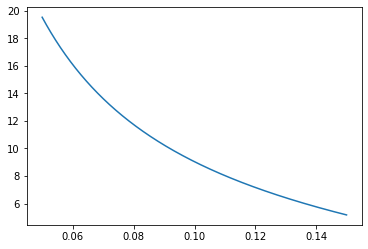

In [ ]:
def adbas(df,y0,x0,n,h):
  """
  Se usa el método de dos pasos de Adams-Bashforth explícito
  para resolver una ecaución diferencial de la forma df(x,y)
  con condición inicial y(x0)=y0 en un intervalo (x0,nh)
  """
  import numpy as np

  #Definimos los array para guardar los valores
  x=np.zeros(n,float)
  y=np.zeros(n,float)
  x[0]=x0
  for i in range(1,n):
    x[i]=x[i-1]+h

  #Condición incial
  y[0]=y0

  #Calculamos una aproximación de y1 con el método Forward de Euler
  y[1]=y[0]+h*df(x[0],y[0])

  #Aplicamos Adams-Bashforth
  for i in range(2,n):
    y[i] = y[i-1] + (h/2)*( 3*df(x[i-1],y[i-1]) - df(x[i-2],y[i-2]) )
  return [x,y]

import numpy as np
import matplotlib.pyplot as plt

#Definimos una función con la ecuación diferencial
df=lambda x,y: (2*x*y-30)/(1-x**2)-y**2

x0=0.05
y0=19.53
n=1000
h=0.0001

f=adbas(df,y0,x0,n,h)

#Graficamos
plt.plot(f[0],f[1])

##2. Ecuación de calor (animación)

Se resuelve la ecuación de calor, generando una animación con el resultado.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

long_x = int(input('Longitud del lado de la placa:'))
long_y = long_x
tiempo_max_k = int(input('Tiempo:'))

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Crear cuadrícula para u(k, i, j)
u = np.empty((tiempo_max_k,long_x,long_y))

# Condicion inicial
u_inicial = float(input('Temperatura inicial:'))

# Condiciones de Frontera
u_ini = float(input('Temperatura del lado superior:'))
u_izq = float(input('Temperatura del lado izquierdo:'))
u_fin = float(input('Temperatura del lado inferior:'))
u_der = float(input('Temperatura del lado derecho:'))

# Establecer la condición inicial a lo largo de la Cuadricula
u.fill(u_inicial)

# Establecer las conidiciones de Frontera en la Cuadricula
u[:, (long_x-1):, :] = u_ini
u[:, :, :1] = u_izq
u[:, :1, 1:] = u_fin
u[:, :, (long_y-1):] = u_der

def calculate(u):
    for k in range(0, tiempo_max_k-1, 1):
        for i in range(1, long_x-1, delta_x):
            for j in range(1, long_y-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Borrar la figura actual
    plt.clf()

    plt.title(f"Temperatura a t = {k*delta_t:.3f} unidad t")
    plt.xlabel("x")
    plt.ylabel("y")

    # Grafica del paso t u_k (u al paso de tiempo k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=u_ini)
    plt.colorbar()

    return plt

# Realizar el calculo de u
u = calculate(u)

#Animación
def animate(k):
  plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=tiempo_max_k, repeat=True)
plt.show()

Longitud del lado de la placa:30
Tiempo:800
Temperatura inicial:0
Temperatura del lado superior:0
Temperatura del lado izquierdo:0
Temperatura del lado inferior:0
Temperatura del lado derecho:300


<Figure size 432x288 with 0 Axes>

##2. Ecuación de calor (gráfico 3D)

Se usa la solución del problema anterior para representarla en una superficie 3D

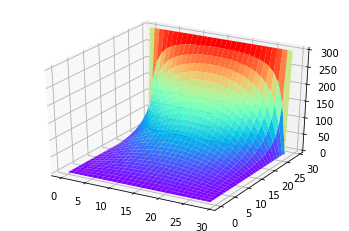

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#Definimos los lados de la superficie
a=np.zeros(30,int)
for i in range(len(a)):
  a[i]=i
b=a
a,b=np.meshgrid(a,b)

#Graficamos
t=799
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(a,b,u[t,a,b],cmap="rainbow")
plt.contour(a,b,u[1,a,b],cmap="rainbow")
plt.show()